In [ ]:
!python -m pip install pandas

In [ ]:
!pip install --upgrade seaborn featuretools tpot

In [ ]:
!pip list | grep seaborn

seaborn                            0.13.2


In [ ]:
!pip install --upgrade seaborn

In [ ]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 83.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.0.0 requires numpy==1.26.4, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from tpot import TPOTRegressor
from sklearn.datasets import fetch_california_housing

In [ ]:
# Objective: Train a machine learning model on a housing dataset using esemble learning techniques:Bagging,Boosting,and Stacking
# Additionally, perform automated feature engineering and feature extraction from time series geospatial data.

# Load dataset
california = fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['target']=california.target

In [ ]:
# Feature Engineering with FeatureTools
import featuretools as ft # Import the featuretools library as ft
es = ft.EntitySet(id="housing")
es.add_dataframe(dataframe_name="data",dataframe=df,index="index")
feature_matrix,feature_defs=ft.dfs(entityset=es,target_dataframe_name="data",trans_primitives=["add_numeric","multiply_numeric"])

/usr/local/lib/python3.11/dist-packages/featuretools/entityset/entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [ ]:
# Selecting numerical features and target
x=df[['MedInc', 'HouseAge', 'AveRooms','AveOccup']].dropna()
y=df['target']

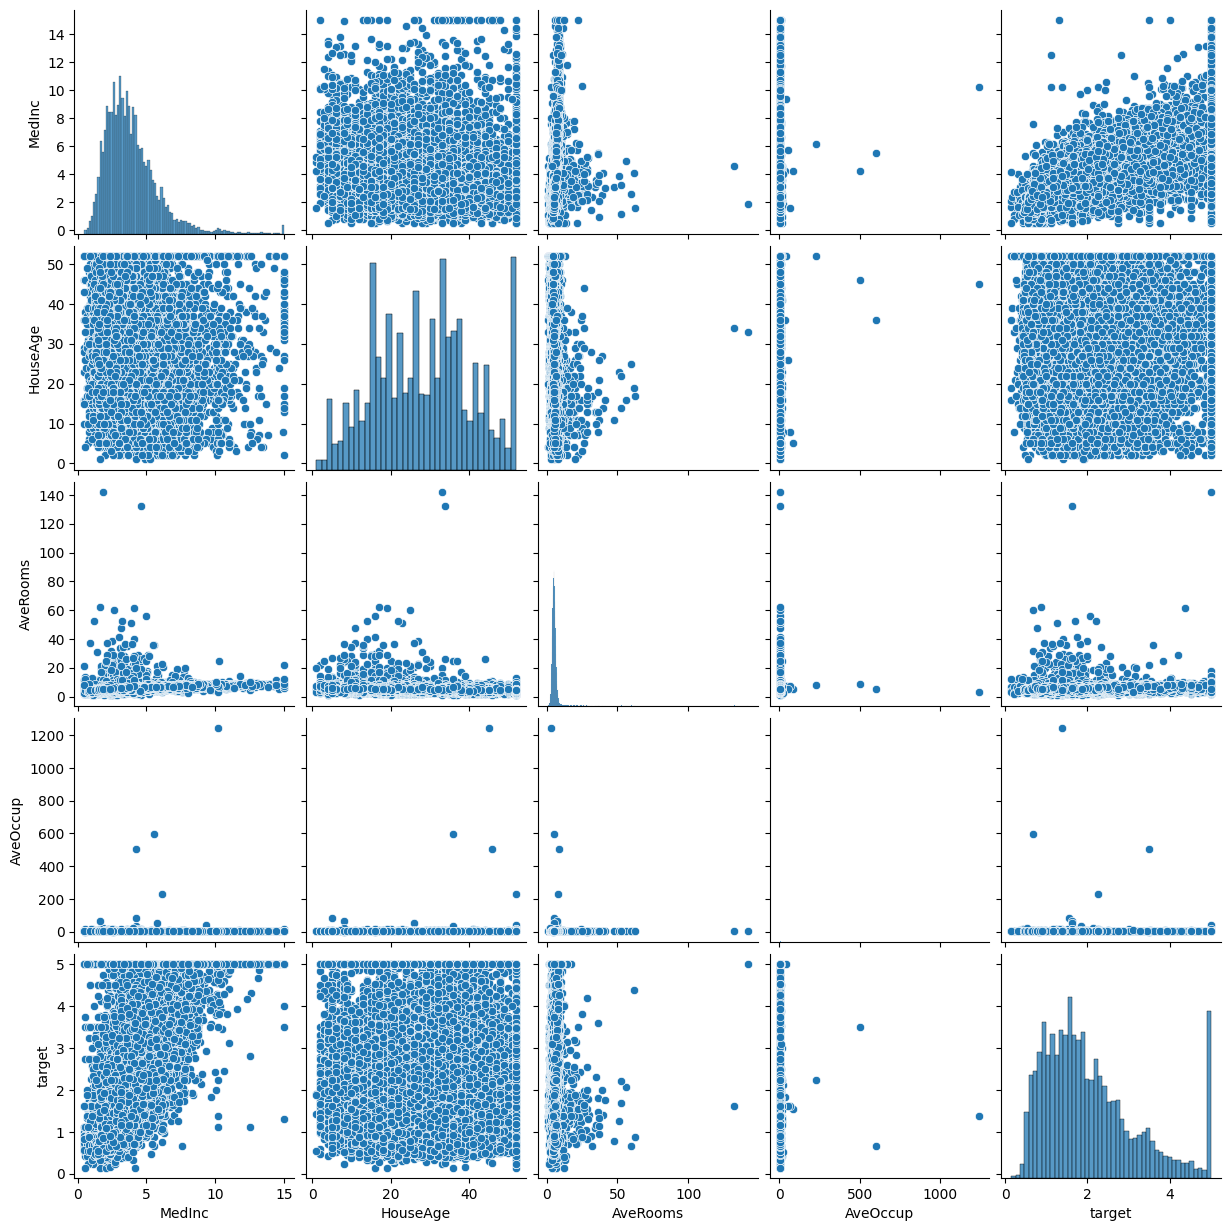

In [ ]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df[['MedInc','HouseAge','AveRooms','AveOccup','target']])
plt.show()

In [ ]:
# Splitting Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Standardize data features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
# Apply PCA for Dimensionality Reduction
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

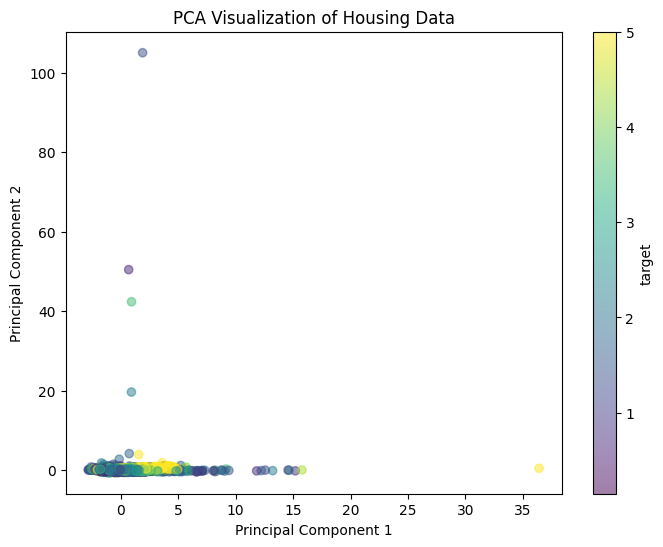

In [ ]:
# PCA Visualization
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train,cmap='viridis',alpha=0.5)
plt.colorbar(label='target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Housing Data')
plt.show()

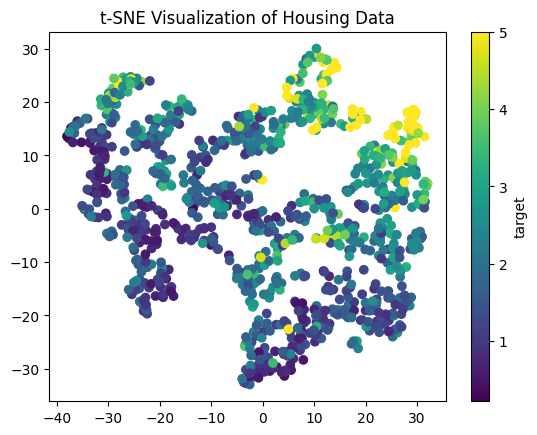

In [ ]:
# Apply t-SNE for Visualization
sample_size = 1000 # Reduce data for t-SNE to avoid computation overload
x_sample,y_sample=x_train[:sample_size],y_train[:sample_size]
tsne=TSNE(n_components=2,random_state=42)
x_train_tsne=tsne.fit_transform(x_sample)
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1],c=y_sample,cmap='viridis')
plt.colorbar(label='target')
plt.title('t-SNE Visualization of Housing Data')
plt.show()

In [ ]:
# Train Ensamble Models
bagging_model=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,random_state=42)
bagging_model.fit(x_train_pca,y_train)

boosting_model=AdaBoostRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,random_state=42)
boosting_model.fit(x_train_pca,y_train)

stacking_model=StackingRegressor(
    estimators=[('dt',DecisionTreeRegressor()),('rf',RandomForestRegressor())],
    final_estimator=LinearRegression()
)
stacking_model.fit(x_train_pca,y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
# Automated Model Selection with TPOT
tpot=TPOTRegressor(generations=5,population_size=50,random_state=42)
tpot.fit(x_train_pca,y_train)

/usr/local/lib/python3.11/dist-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36295
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36625'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:33839 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33839
INFO:distributed.core:Starting established connection to tcp://127.0.0.1

Exception: ModuleNotFoundError("No module named 'numpy._core.numeric'")